# Implementing Ollivier-Ricci Curvature with Diffusion EMD

In [93]:
%load_ext autoreload
%autoreload 2
import numpy as np
from DiffusionEMD import DiffusionCheb
from pecan import data
import matplotlib.pyplot as plt
import graphtools
from DiffusionEMD.estimate_utils import l1_distance_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Build the torus and create a graph, along with the accompanying diffusion operator.

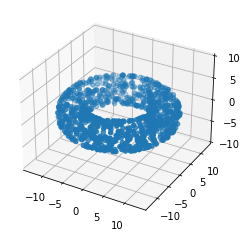

In [138]:
X = data.torus(1000,inner_radius=3,outer_radius=10) # make a 500 point torus
# visualize
fig = plt.figure()
ax = plt.subplot(projection='3d')
ax.set_zlim(-10,10)
ax.scatter(X[:,0],X[:,1],X[:,2])

In [139]:
G = graphtools.graphs.kNNGraph(X)

Calculating KNN search...


In [140]:
P = G.P.toarray()
P_symmetric = G.diff_aff.toarray()
A = G.K.toarray() - np.eye(len(P))

Create two distributions on the torus.

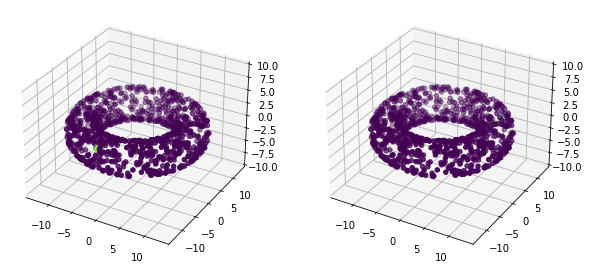

In [97]:
distributions = np.zeros((len(A),2))
distributions[:,0][40] = 1
distributions[:,1][55] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

Find DEMD between distributions

# Testing Ollivier-Ricci-DEMD curvature on the donut

## With DEMD Curvature

In [135]:
from pecan.curvature import Ollivier_Ricci_Curvature_DEMD
ORC = Ollivier_Ricci_Curvature_DEMD(G) # initialize with a graphtools graph of the torus

Test curvature between various points on the torus

With nice visualizations

DEMD is 0.6312007569647029
Diffusion distance is 8.394341818527124


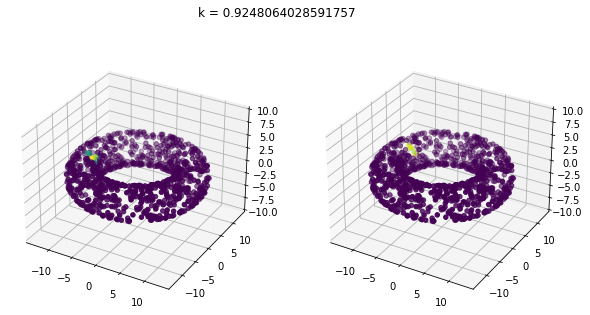

In [111]:
i = 1
j = 5
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

DEMD is 0.0009530877466533381
Diffusion distance is 1.1196654267838928


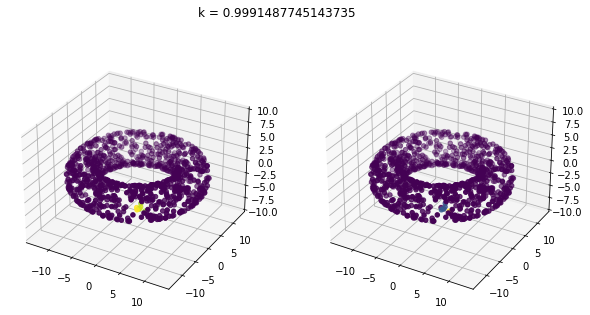

In [105]:
i = 50
diffusion_probs = np.linalg.matrix_power(P,3)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

DEMD is 0.13339951446174167
Diffusion distance is 0.29792146229753036


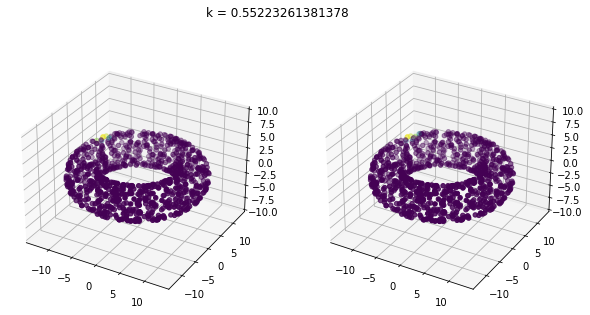

In [20]:
i = 100
diffusion_probs = np.linalg.matrix_power(P,3)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

DEMD is 0.15493572584591772
Diffusion distance is 0.24333789055215246


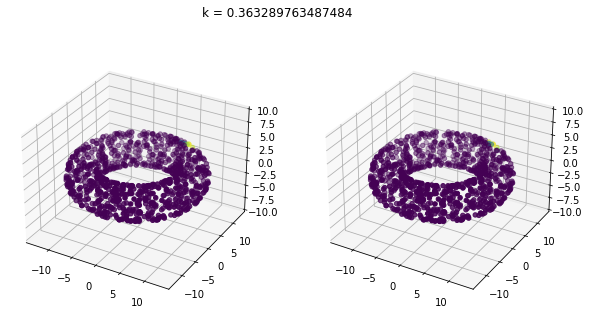

In [21]:
i = 150
diffusion_probs = np.linalg.matrix_power(P,3)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

DEMD is 0.5055653577175604
Diffusion distance is 0.5345624173701987


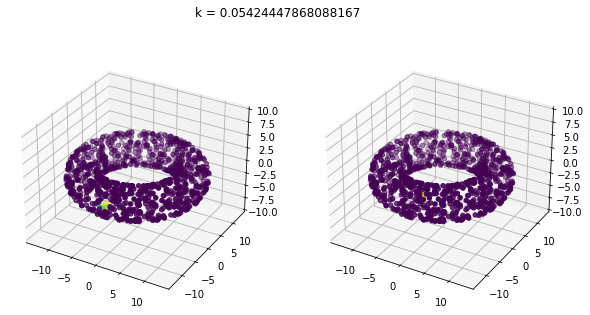

In [22]:
i = 200
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

DEMD is 0.19897227769779566
Diffusion distance is 0.5034739028021619


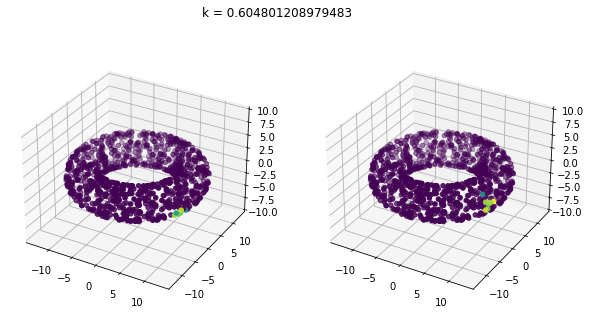

In [23]:
i = 220
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

DEMD is 0.3506386672464615
Diffusion distance is 0.5360531913534018


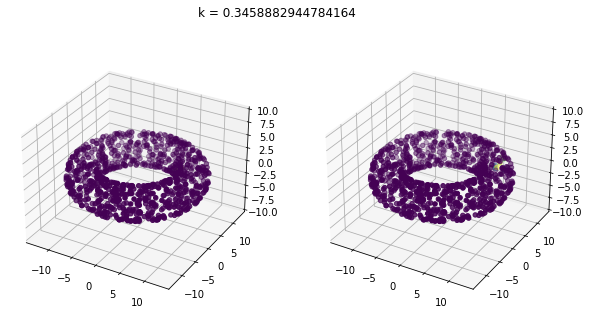

In [24]:
i = 240
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

## Using Total DEMD Curvature (with DEMD dirac distance as the ground distance)

In [141]:
from pecan.curvature import Ollivier_Ricci_Curvature_DEMD_Total
ORC = Ollivier_Ricci_Curvature_DEMD_Total(G) # initialize with a graphtools graph of the torus

EMD between diffused diracs is 0.29253938330365103
EMD between diracs is 0.08194065689050503


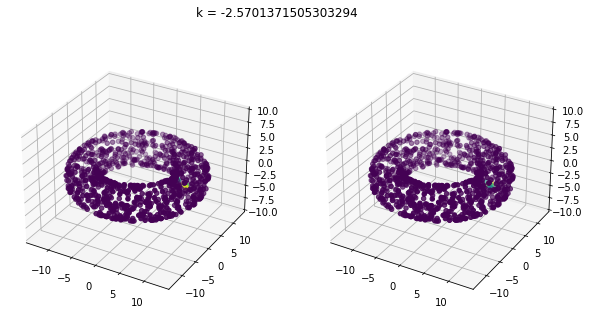

In [142]:
i = 240
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

EMD between diffused diracs is 0.28773875698331064
EMD between diracs is 0.2805706919687291


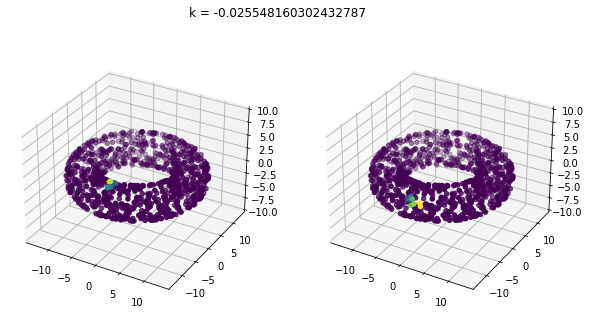

In [143]:
i = 48
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

EMD between diffused diracs is 0.27061889804775285
EMD between diracs is 0.30194374995656514


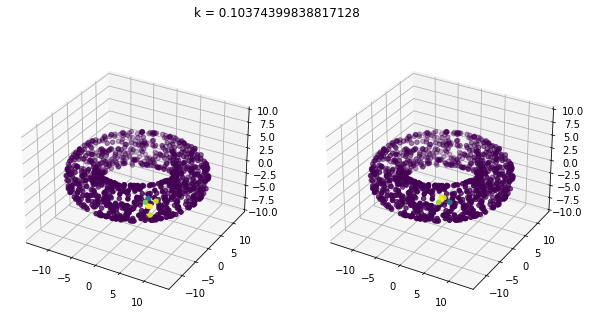

In [144]:
i = 108
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

EMD between diffused diracs is 0.1641274844635368
EMD between diracs is 0.0917000233268663


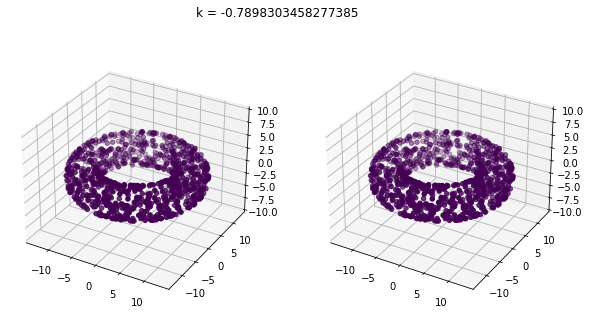

In [145]:
i = 280
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

# Using Regular OT

In [87]:
from pecan.curvature import Ollivier_Ricci_Curvature_Regular_OT_with_Diffusion_Distances
ORC_regular = Ollivier_Ricci_Curvature_Regular_OT_with_Diffusion_Distances(G,0) # initialize with a graphtools graph of the torus

EMD is 0.0
Diffusion distance is 0.5736472438015894


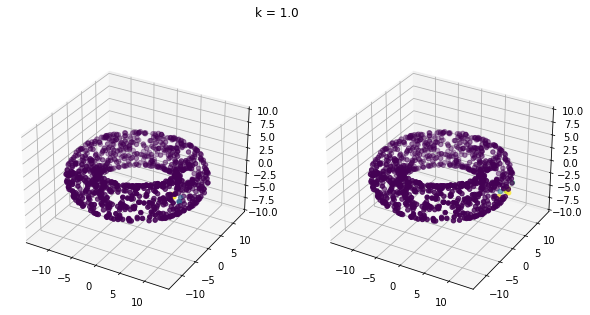

In [48]:
i = 240
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

EMD is 0.0
Diffusion distance is 0.45189665392908107


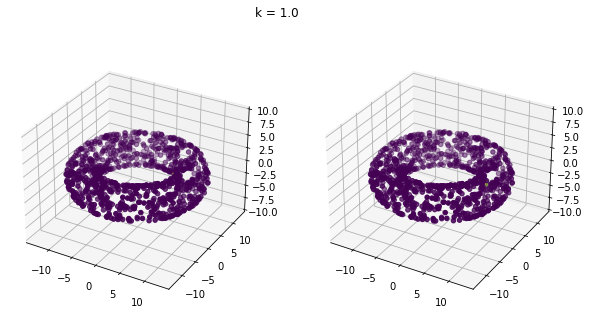

In [49]:
i = 270
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

EMD is 0.0
Diffusion distance is 0.5699714959812837


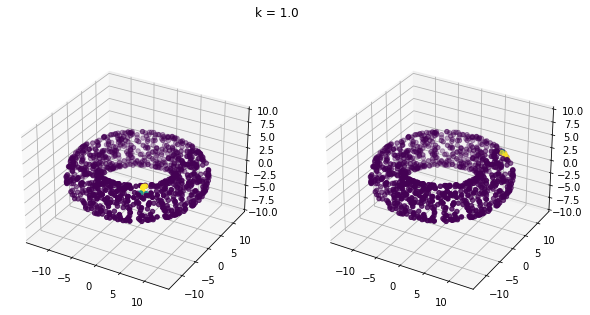

In [89]:
i = 290
diffusion_probs = np.linalg.matrix_power(P,20)[i] # choose a random point within a 3 step random walk
j = 130 #np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = distributions.T @ P
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[1])

In [ ]:
distribut

In [90]:
distributions.shape

(2, 1000)

In [92]:
import ot
d = ot.emd2(np.ascontiguousarray(distributions[0]),np.ascontiguousarray(distributions[1]),ORC_regular.diffusion_distance_matrix)
d

0.5477199541236274

# Testing with a planar graph


In [146]:
X = np.mgrid[0:1:0.1, 0:1:0.1].reshape(2,-1).T

In [156]:
GPlanar = graphtools.graphs.kNNGraph(X, knn=4)
P = GPlanar.P.toarray()

Calculating KNN search...


## Using regular OT

In [157]:
from pecan.curvature import Ollivier_Ricci_Curvature_Regular_OT_with_Diffusion_Distances
ORC_regular = Ollivier_Ricci_Curvature_Regular_OT_with_Diffusion_Distances(GPlanar,0) # initialize with a graphtools graph of the torus

EMD is 0.0
Diffusion distance is 0.55617264151366


/Users/adjourner/Library/Caches/pypoetry/virtualenvs/pecan-CtxN46k2-py3.7/lib/python3.7/site-packages/ot/lp/__init__.py:421: UserWarning: Problem infeasible. Check that a and b are in the simplex
  check_result(result_code)


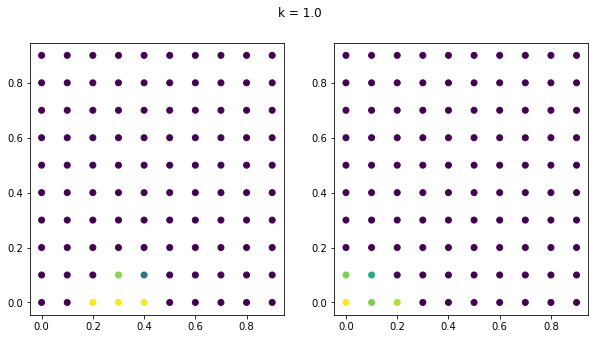

In [158]:
i = 30
diffusion_probs = np.linalg.matrix_power(P,100)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(P),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1)
ax1.scatter(X[:,0],X[:,1],c=distributions[:,0])
ax2 = plt.subplot(1,2,2)
ax2.scatter(X[:,0],X[:,1],c=distributions[:,1])

## With DEMD

In [35]:
from pecan.curvature import Ollivier_Ricci_Curvature_DEMD
ORC = Ollivier_Ricci_Curvature_DEMD(GPlanar,lp=2) # initialize with a graphtools graph of the torus

DEMD is 0.2324767630061529
Diffusion distance is 0.5631195285791818


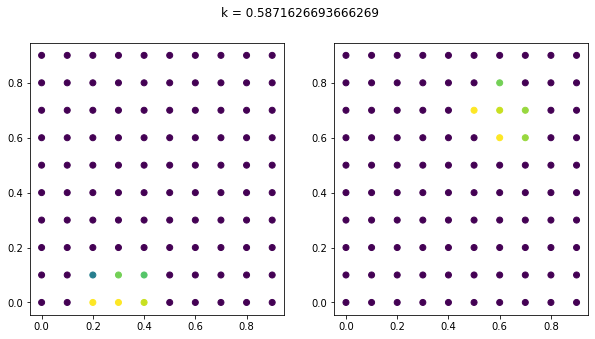

In [36]:
i = 30
diffusion_probs = np.linalg.matrix_power(P,100)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(P),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1)
ax1.scatter(X[:,0],X[:,1],c=distributions[:,0])
ax2 = plt.subplot(1,2,2)
ax2.scatter(X[:,0],X[:,1],c=distributions[:,1])

## With DEMD Total

In [148]:
from pecan.curvature import Ollivier_Ricci_Curvature_DEMD_Total
ORC = Ollivier_Ricci_Curvature_DEMD_Total(GPlanar,lp=2) # initialize with a graphtools graph of the torus

EMD between diffused diracs is 0.1376669621070137
EMD between diracs is 0.09422586775276157


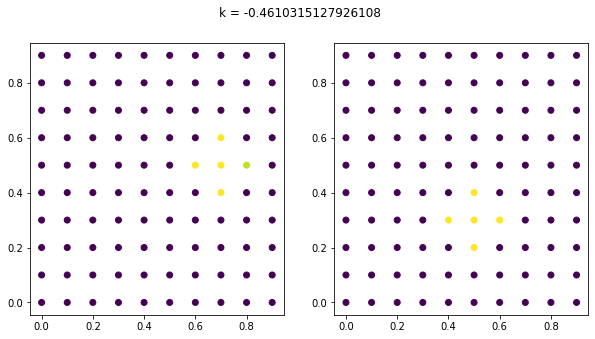

In [161]:
i = 75
diffusion_probs = np.linalg.matrix_power(P,100)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(P),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1)
ax1.scatter(X[:,0],X[:,1],c=distributions[:,0])
ax2 = plt.subplot(1,2,2)
ax2.scatter(X[:,0],X[:,1],c=distributions[:,1])